In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 5
fig_height = 4
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvdWJ1bnR1L2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lzL2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/usr/lib/python3.12/importlib/_bootstrap.py": 1755193641.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1755193641.0, "/usr/lib/python3.12/zipimport.py": 1755193641.0, "/usr/lib/python3.12/codecs.py": 1755193641.0, "/usr/lib/python3.12/encodings/aliases.py": 1755193641.0, "/usr/lib/python3.12/encodings/__init__.py": 1755193641.0, "/usr/lib/python3.12/encodings/utf_8.py": 1755193641.0, "/usr/lib/python3.12/abc.py": 1755193641.0, "/usr/lib/python3.12/io.py": 1755193641.0, "/usr/lib/python3.12/stat.py": 1755193641.0, "/usr/lib/python3.12/_collections_abc.py": 1755193641.0, "/usr/lib/python3.12/genericpath.py": 1755193641.0, "/usr/lib/python3.12/posixpath.py": 1755193641.0, "/usr/lib/python3.12/os.py": 1755193641.0, "/usr/lib/python3.12/_sitebuiltins.py": 1755193641.0, "/home/ubuntu/ad688_group6_geographic_analysis/.venv/lib/python3.12/site-packages/_distutils_hack/__init__.py": 1760104492.1123328, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/sit

In [2]:
from pyspark.sql import SparkSession


# Start a Spark session
spark = SparkSession.builder.appName("JobPostingsAnalysis").getOrCreate()

# Load the CSV file into a Spark DataFrame
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("../data/lightcast_job_postings.csv")


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/10/16 02:35:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
import pandas as pd
from pyspark.sql.functions import when, col

#Clean Data to convert to Pandas
columns_to_drop = ["ID", "BODY", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_4", "SOC_5", "LAST_UPDATED_DATE", "LAST_UPDATED_TIMESTAMP", "EXPIRED", "SOURCE_TYPES", "SOURCES", "ACTIVE_SOURCES_INFO", "MODELED_EXPIRED", "MODELED_DURATION", "NAICS2_NAME", "NAICS3_NAME", "NAICS4_NAME", "NAICS5_NAME", "NAICS6_NAME",
    "SOC_2_NAME", "SOC_3_NAME", "SOC_4_NAME", "SOC_5_NAME", "EDUCATION_LEVELS", "MIN_EDULEVELS"
    
]
cleaned_data = df.drop(*columns_to_drop)

cleaned_data = cleaned_data.withColumn(
    "REMOTE_TYPE_NAME",
    when(col("REMOTE_TYPE_NAME") == "Remote", "Remote")
    .when(col("REMOTE_TYPE_NAME") == "Hybrid Remote", "Hybrid")
    .when(col("REMOTE_TYPE_NAME") == "[None]", "On-site")
    .when(col("REMOTE_TYPE_NAME").isNull(), "On-site")
    .when(col("REMOTE_TYPE_NAME") == "Not Remote", "On-site")
    .otherwise(col("REMOTE_TYPE_NAME"))
)

cleaned_data = cleaned_data.withColumn(
    "EMPLOYMENT_TYPE_NAME",
    when(col("EMPLOYMENT_TYPE_NAME") == "Part-time / full-time", "Flexible")
    .when(col("EMPLOYMENT_TYPE_NAME").isNull(), "Full-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Part-time (â‰¤ 32 hours)", "Part-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Full-time (> 32 hours)", "Full-Time")
    .otherwise(col("EMPLOYMENT_TYPE_NAME")) 
)

cleaned_data = cleaned_data.filter(col("NAICS_2022_2_NAME") != "Unclassified Industry")

median_salary = cleaned_data.approxQuantile("SALARY", [0.5], 0.01)[0]
cleaned_data = cleaned_data.withColumn(
    "SALARY",
    when(col("SALARY").isNull(), median_salary).otherwise(col("SALARY"))
)


clean_pdf = cleaned_data.toPandas()


25/10/16 02:35:34 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


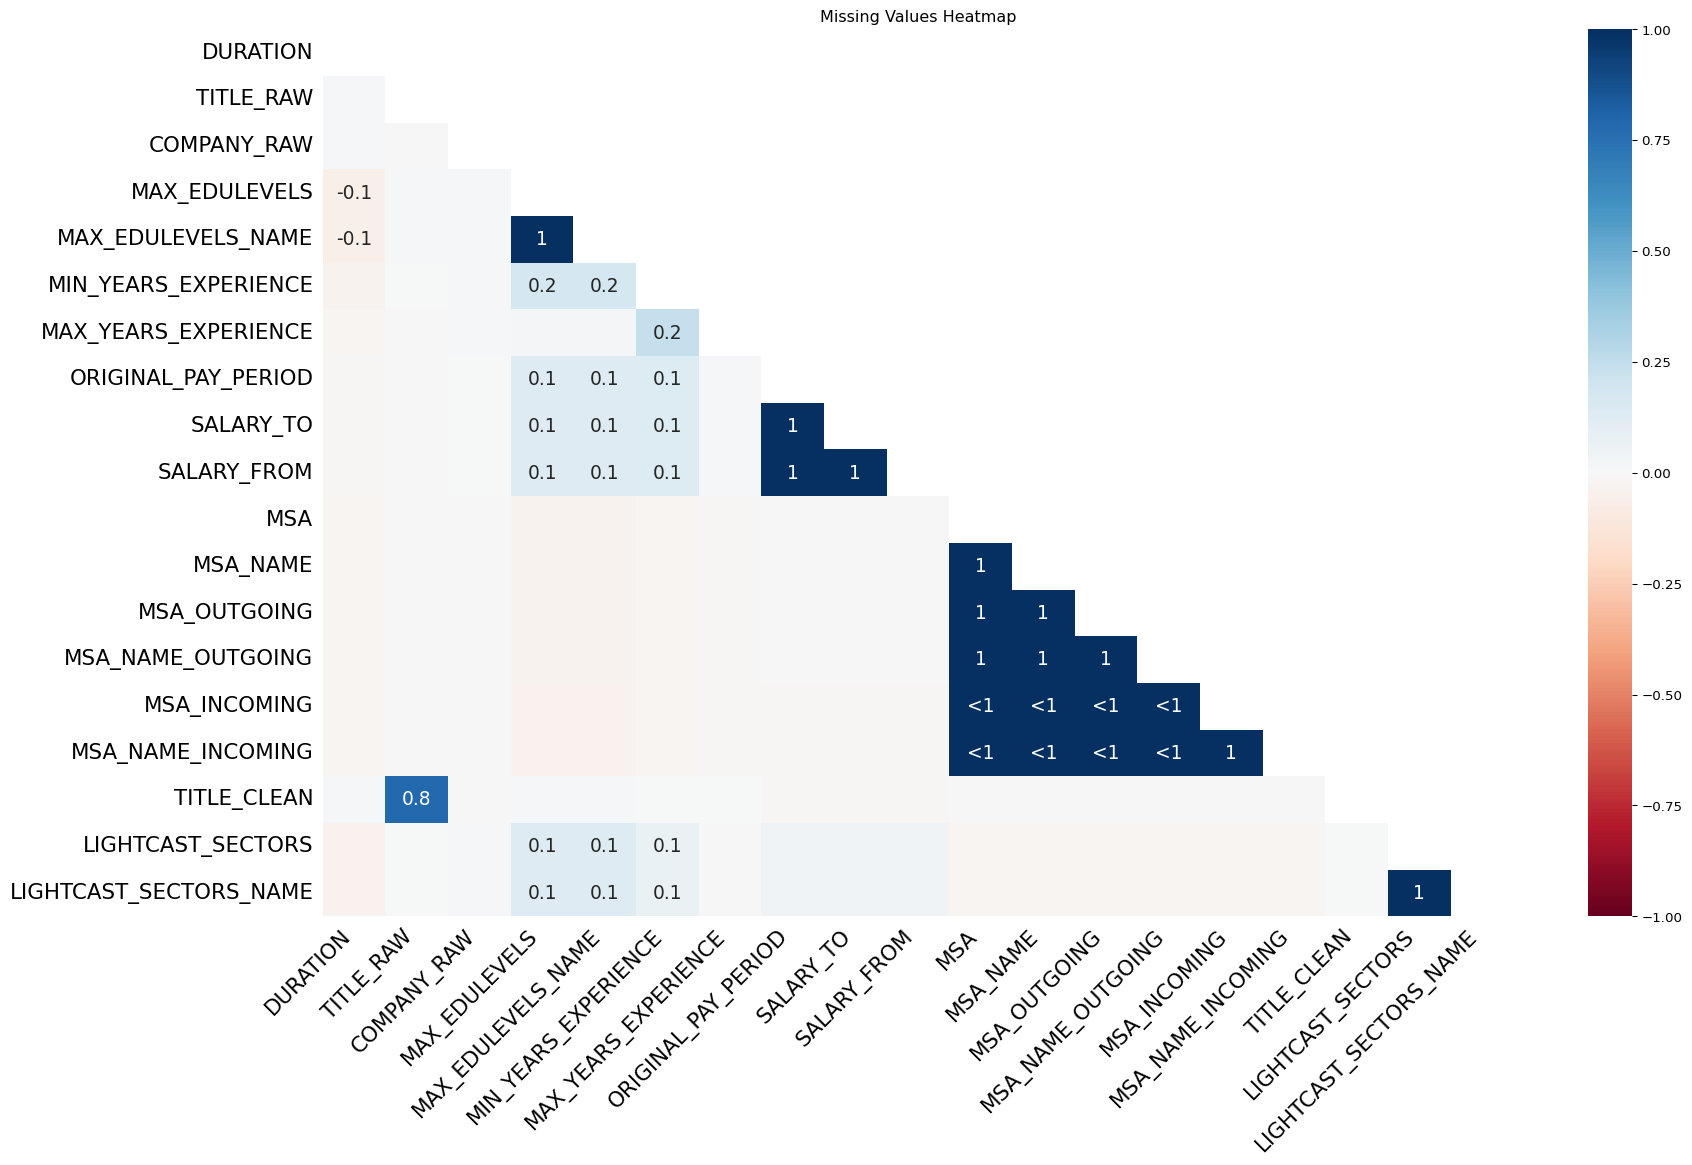

In [4]:
#| echo: true
#| eval: true
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data
msno.heatmap(clean_pdf)
plt.title("Missing Values Heatmap")
plt.show()

fill_cols = ["CITY_NAME", "CITY", "LOCATION", "STATE", "STATE_NAME", "COMPANY", "COMPANY_NAME"]
clean_pdf[fill_cols] = clean_pdf[fill_cols].fillna("Unknown")

clean_pdf = clean_pdf.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"], keep="first")

clean_pdf.dropna(thresh=len(clean_pdf)*0.5, axis=1, inplace=True)


In [5]:
#New Column to Classify AI Jobs and Add Month of Posting Date


ai_keywords = [
    "AI", "Machine Learning", "Data Scientist", "Data Analyst", "ML", 
    "Artificial Intelligence", "Deep Learning", "NLP", "Predictive Analytics"
]

#Function to classify AI vs Non-AI Jobs
def classify_ai(title):
    title_lower = str(title).lower()
    for keyword in ai_keywords:
        if keyword.lower() in title_lower:
            return "AI"
    return "Non-AI"

clean_pdf["AI_JOB"] = clean_pdf["TITLE_RAW"].apply(classify_ai)

clean_pdf["POSTED"] = pd.to_datetime(clean_pdf["POSTED"], errors="coerce")
clean_pdf["POSTED_MONTH"] = clean_pdf["POSTED"].dt.month

clean_pdf.head(25)

,POSTED,DURATION,TITLE_RAW,COMPANY,COMPANY_NAME,COMPANY_RAW,COMPANY_IS_STAFFING,EDUCATION_LEVELS_NAME,MIN_EDULEVELS_NAME,EMPLOYMENT_TYPE,...,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME,AI_JOB,POSTED_MONTH
0,2024-06-02,6.0,Enterprise Analyst (II-III),894731,Murphy USA,Murphy USA,False,"[\n ""Bachelor's degree""\n]",Bachelor's degree,1,...,441,Motor Vehicle and Parts Dealers,4413,"Automotive Parts, Accessories, and Tire Retailers",44133,Automotive Parts and Accessories Retailers,441330,Automotive Parts and Accessories Retailers,Non-AI,6
1,2024-06-02,NaN,Oracle Consultant - Reports (3592),133098,Smx Corporation Limited,SMX,True,"[\n ""No Education Listed""\n]",No Education Listed,1,...,561,Administrative and Support Services,5613,Employment Services,56132,Temporary Help Services,561320,Temporary Help Services,Non-AI,6
2,2024-06-02,35.0,Data Analyst,39063746,Sedgwick,Sedgwick,False,"[\n ""Bachelor's degree""\n]",Bachelor's degree,1,...,524,Insurance Carriers and Related Activities,5242,"Agencies, Brokerages, and Other Insurance Rela...",52429,Other Insurance Related Activities,524291,Claims Adjusting,AI,6
3,2024-06-02,48.0,Sr. Lead Data Mgmt. Analyst - SAS Product Owner,37615159,Wells Fargo,Wells Fargo,False,"[\n ""No Education Listed""\n]",No Education Listed,1,...,522,Credit Intermediation and Related Activities,5221,Depository Credit Intermediation,52211,Commercial Banking,522110,Commercial Banking,Non-AI,6
4,2024-06-02,10.0,SR Lead Data Analyst,2233642,Lumen Technologies,Lumen,False,"[\n ""Bachelor's degree""\n]",Bachelor's degree,1,...,517,Telecommunications,5178,All Other Telecommunications,51781,All Other Telecommunications,517810,All Other Telecommunications,AI,6
5,2024-06-02,NaN,Talent Data Analyst,44896740,Semiconductor Components Industries,"Semiconductor Components Industries, LLC",False,"[\n ""Bachelor's degree""\n]",Bachelor's degree,1,...,334,Computer and Electronic Product Manufacturing,3344,Semiconductor and Other Electronic Component M...,33441,Semiconductor and Other Electronic Component M...,334413,Semiconductor and Related Device Manufacturing,AI,6
6,2024-06-02,35.0,Data Analyst,39063746,Sedgwick,Sedgwick,False,"[\n ""Bachelor's degree""\n]",Bachelor's degree,1,...,524,Insurance Carriers and Related Activities,5242,"Agencies, Brokerages, and Other Insurance Rela...",52429,Other Insurance Related Activities,524291,Claims Adjusting,AI,6
7,2024-06-02,NaN,Sr. Marketing Analyst,39016169,Dassault SystÃ¨mes,Dassault Systmes,False,"[\n ""Bachelor's degree"",\n ""Master's degree""\n]",Bachelor's degree,1,...,541,"Professional, Scientific, and Technical Services",5415,Computer Systems Design and Related Services,54151,Computer Systems Design and Related Services,541511,Custom Computer Programming Services,Non-AI,6
8,2024-06-02,NaN,Data Analyst,12147696,DCS Corporation,DCS Corp.,False,"[\n ""High school or GED"",\n ""Associate degre...",High school or GED,1,...,423,"Merchant Wholesalers, Durable Goods",4238,"Machinery, Equipment, and Supplies Merchant Wh...",42383,Industrial Machinery and Equipment Merchant Wh...,423830,Industrial Machinery and Equipment Merchant Wh...,AI,6
9,2024-06-02,6.0,Data Analyst,4063994,Allegis Group,TEKsystems c/o Allegis Group,True,"[\n ""No Education Listed""\n]",No Education Listed,1,...,561,Administrative and Support Services,5613,Employment Services,56132,Temporary Help Services,561320,Temporary Help Services,AI,6


Top 10 States by AI Job Growth:
       STATE_NAME AI_JOB      GROWTH
20         Hawaii     AI  140.217803
100       Wyoming     AI   90.990260
50        Montana     AI   67.291667
46    Mississippi     AI   58.393822
80   South Dakota     AI   46.527778
34      Louisiana     AI   41.077075
32       Kentucky     AI   40.737045
2          Alaska     AI   40.043290
52       Nebraska     AI   38.870132
86           Utah     AI   36.988636

Top 10 States by Non-AI Job Growth:
                                  STATE_NAME  AI_JOB     GROWTH
101                                  Wyoming  Non-AI  50.555556
21                                    Hawaii  Non-AI  49.105634
97                             West Virginia  Non-AI  43.492753
67                              North Dakota  Non-AI  32.006313
81                              South Dakota  Non-AI  31.818182
47                               Mississippi  Non-AI  28.331625
57                             New Hampshire  Non-AI  25.913029
51          

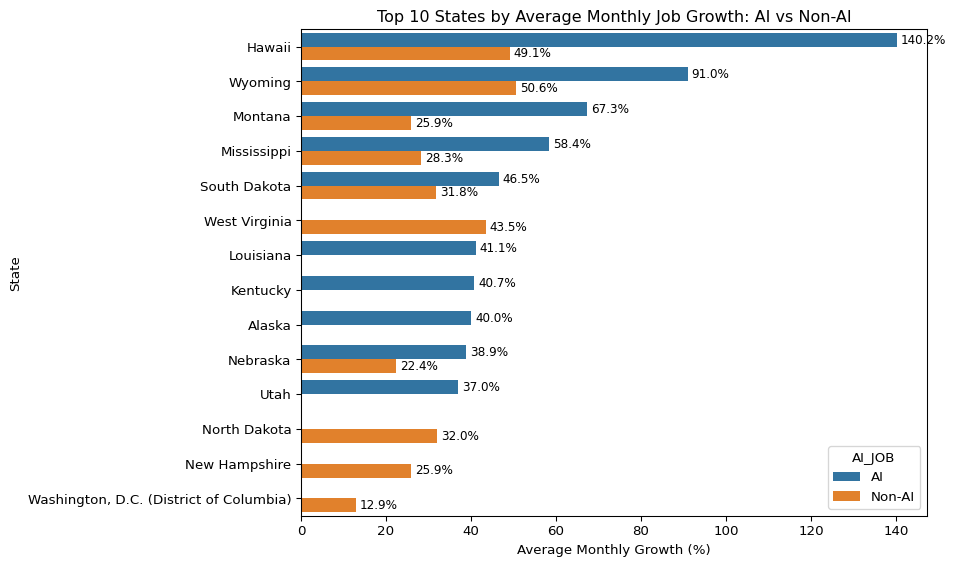

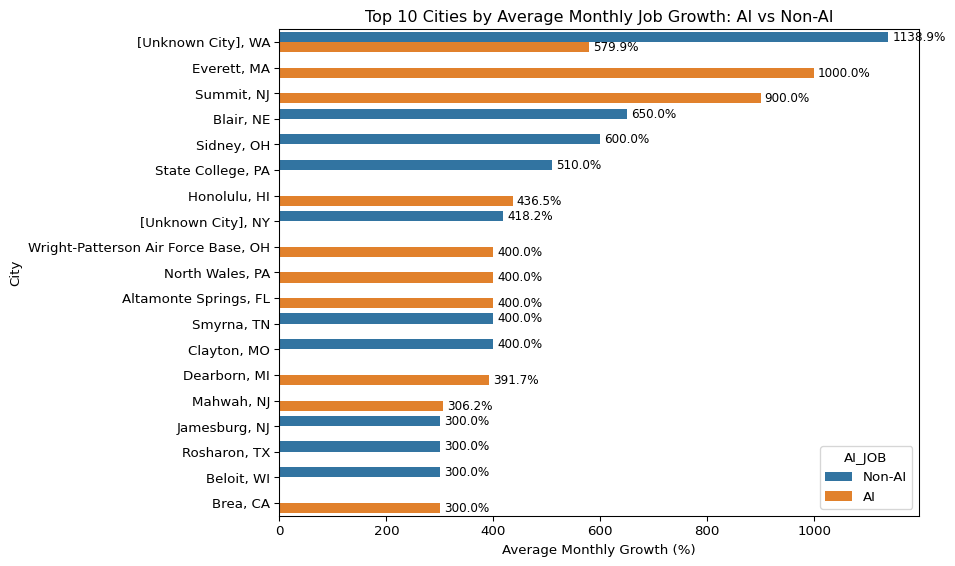

In [6]:
#Question 1 Visualization: Which Cities or States have the highest job growth for AI vs Non-AI

count_by_month_state = (
  clean_pdf.groupby(["STATE_NAME", "POSTED_MONTH", "AI_JOB"])
  .size()
  .reset_index(name="count")
)

count_by_month_city = (
  clean_pdf.groupby(["CITY_NAME", "POSTED_MONTH", "AI_JOB"])
  .size()
  .reset_index(name="count")
)

#Measure job growth by State and then by city
count_by_month_state = count_by_month_state.sort_values(["STATE_NAME", "AI_JOB", "POSTED_MONTH"])
count_by_month_state["GROWTH"] = (
  count_by_month_state
  .groupby(["STATE_NAME", "AI_JOB"])["count"]
  .pct_change() * 100
)

count_by_month_city = count_by_month_city.sort_values(["CITY_NAME", "AI_JOB", "POSTED_MONTH"])
count_by_month_city["GROWTH"] = (
  count_by_month_city
  .groupby(["CITY_NAME", "AI_JOB"])["count"]
  .pct_change() * 100
)

avg_growth_state = (
    count_by_month_state.groupby(["STATE_NAME", "AI_JOB"])["GROWTH"]
    .mean()
    .reset_index()
    .dropna()
    .sort_values("GROWTH", ascending=False)
)

avg_growth_city = (
    count_by_month_city.groupby(["CITY_NAME", "AI_JOB"])["GROWTH"]
    .mean()
    .reset_index()
    .dropna()
    .sort_values("GROWTH", ascending=False)
)

print("Top 10 States by AI Job Growth:")
print(avg_growth_state[avg_growth_state["AI_JOB"] == "AI"].head(10))

print("\nTop 10 States by Non-AI Job Growth:")
print(avg_growth_state[avg_growth_state["AI_JOB"] == "Non-AI"].head(10))

print("Top 10 Cities by AI Job Growth:")
print(avg_growth_city[avg_growth_city["AI_JOB"] == "AI"].head(10))

print("\nTop 10 Cities by Non-AI Job Growth:")
print(avg_growth_city[avg_growth_city["AI_JOB"] == "Non-AI"].head(10))

import matplotlib.pyplot as plt
import seaborn as sns

state_visual = avg_growth_state.groupby("AI_JOB").head(10)

plt.figure(figsize=(10,6))
ax_state = sns.barplot(data=state_visual, y="STATE_NAME", x="GROWTH", hue="AI_JOB")
plt.title("Top 10 States by Average Monthly Job Growth: AI vs Non-AI")
plt.xlabel("Average Monthly Growth (%)")
plt.ylabel("State")

for container in ax_state.containers:
  ax_state.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3, fontsize=9)

plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/top10state.png", dpi=300)
plt.show()

city_visual = avg_growth_city.groupby("AI_JOB").head(10)

plt.figure(figsize=(10,6))
ax_city = sns.barplot(data=city_visual, y="CITY_NAME", x="GROWTH", hue="AI_JOB")
plt.title("Top 10 Cities by Average Monthly Job Growth: AI vs Non-AI")
plt.xlabel("Average Monthly Growth (%)")
plt.ylabel("City")

for container in ax_city.containers:
  ax_city.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3, fontsize=9)

plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/top10city.png", dpi=300)
plt.show()


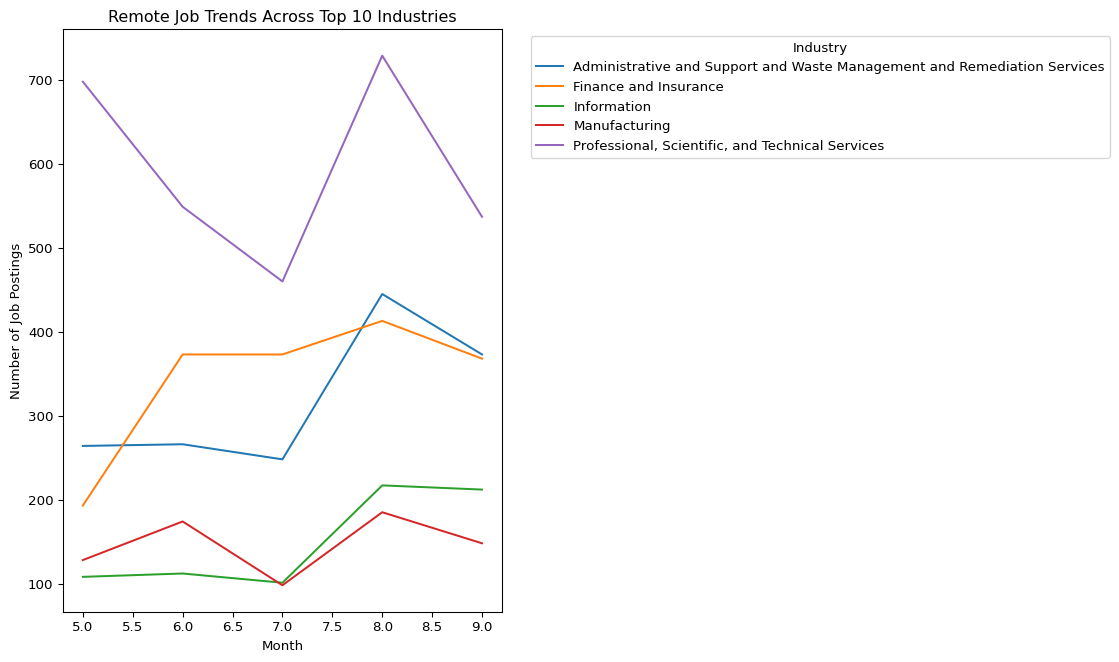

In [7]:
#Question 2: Are remote jobs increasing or decreasing across industries?

remote_only = clean_pdf[clean_pdf["REMOTE_TYPE_NAME"] == "Remote"]

remote_growth = (
  remote_only.groupby(["NAICS_2022_2_NAME", "POSTED_MONTH"])
  .size()
  .reset_index(name="count")
)


top_5_industries = (
  remote_only["NAICS_2022_2_NAME"]
  .value_counts()
  .head(5)
  .index
)

top_remote_growth = remote_growth[remote_growth["NAICS_2022_2_NAME"].isin(top_5_industries)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=top_remote_growth,
    x="POSTED_MONTH",
    y="count",
    hue="NAICS_2022_2_NAME"
)
plt.title("Remote Job Trends Across Top 10 Industries")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/remoteindustries.png", dpi=300)
plt.show()

In [8]:
#Question #3: Do Tech hubs (Silicon Valley, Austin, Boston) still dominate hiring, or are other locations emerging?

tech_hubs = ["Austin-Round Rock-Georgetown, TX", "Boston-Cambridge-Newton, MA-NH","Los Angeles-Long Beach-Anaheim, CA","San Diego-Chula Vista-Carlsbad, CA","San Francisco-Oakland-Berkeley, CA","San Jose-Sunnyvale-Santa Clara, CA","Seattle-Tacoma-Bellevue, WA"]

# Create a column classifying if the city is a tech hub
clean_pdf["TECH_HUB"] = clean_pdf["MSA_NAME"].apply(
    lambda x: "Tech Hub" if x in tech_hubs else "Other"
)

#Count number of postings by Tech Hub
tech_hub_counts = (
  clean_pdf.groupby("MSA_NAME")
  .size()
  .reset_index(name="count")
  .sort_values("count", ascending=False)
)

# Merge to add TECH_HUB classification to each MSA
tech_hub_counts = tech_hub_counts.merge(
    clean_pdf[["MSA_NAME", "TECH_HUB"]].drop_duplicates(),
    on="MSA_NAME",
    how="left"
)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    data=tech_hub_counts.head(15),
    x="MSA_NAME",
    y="count",
    hue="TECH_HUB",
    palette="viridis"
)
plt.title("Top 15 Metro Areas by Count of Job Postings")
plt.xlabel("Tech Hub")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=60, ha="right")

# Add labels on top of bars
for i, row in tech_hub_counts.head(15).iterrows():
    plt.text(row["count"] + 100, i, f"{row['count']:,}", va="center", fontsize=10)

plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/top15techhubs.png", dpi=300)
plt.show()


/tmp/ipykernel_7310/218927844.py:46: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



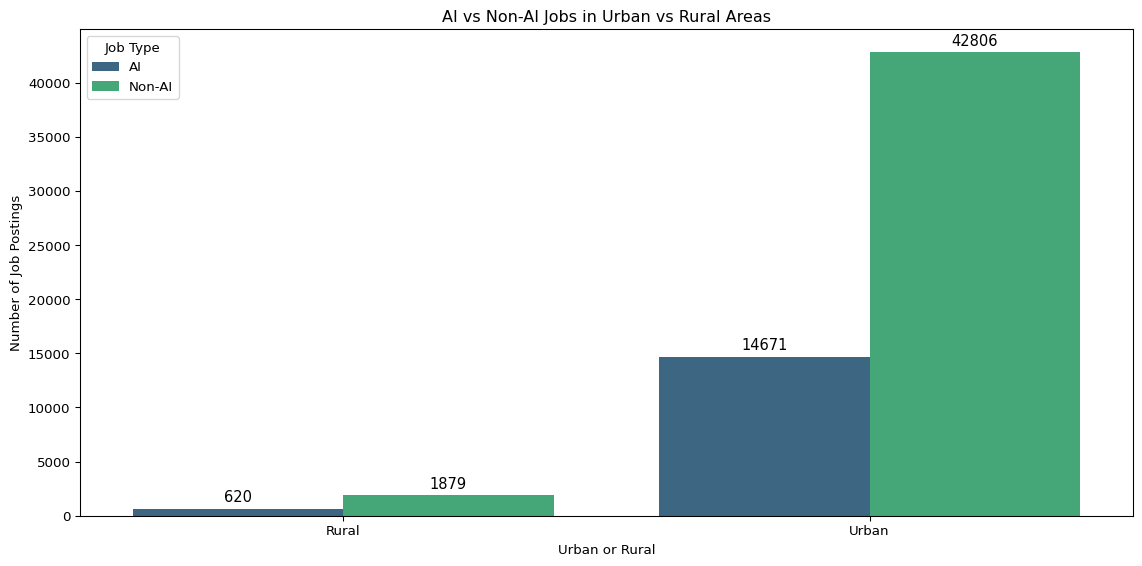

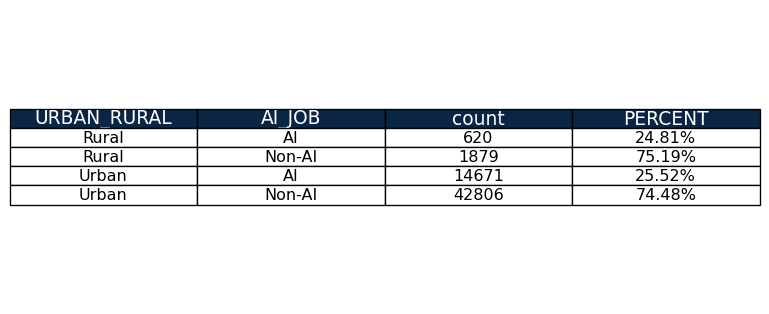

In [9]:
# Question 4: How do Urban vs. Rural Job markets differ for AI and non-AI careers?

# Classify as 'Urban' if MSA_NAME is present, else 'Rural'
clean_pdf["URBAN_RURAL"] = clean_pdf["MSA_NAME"].apply(lambda x: "Urban" if pd.notnull(x) else "Rural")

# Group data by month, urban/rural, and AI vs Non-AI
urban_rural_jobs = (
    clean_pdf.groupby(["URBAN_RURAL", "AI_JOB"])
    .size()
    .reset_index(name="count")
)

#Calculate percentages
urban_rural_jobs["PERCENT"] = (
  urban_rural_jobs.groupby("URBAN_RURAL")["count"]
  .apply(lambda x: 100 * x / x.sum())
  .values
)

#Convert Percentage into 2 decimal places

urban_rural_jobs["PERCENT"] = urban_rural_jobs["PERCENT"].apply(lambda x:f"{x:.2f}%")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax_urban = sns.barplot(
    data=urban_rural_jobs,
    x="URBAN_RURAL",
    y="count",
    hue="AI_JOB",
    palette="viridis"
)

plt.title("AI vs Non-AI Jobs in Urban vs Rural Areas")
plt.xlabel("Urban or Rural")
plt.ylabel("Number of Job Postings")
plt.legend(title="Job Type")

for container in ax_urban.containers:
  ax_urban.bar_label(container, fmt="%d", label_type="edge", padding=3, fontsize=11)
plt.tight_layout()
plt.savefig("../ad688_group6_geographic_analysis/images/urbanai.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(7,4))  
ax.axis('off') 

table = ax.table(
    cellText=urban_rural_jobs.values,
    colLabels=urban_rural_jobs.columns,
    cellLoc='center',
    loc='center',
    colColours=["#0b2545"]*len(urban_rural_jobs.columns),  # Dark blue header
    colWidths=[0.3]*len(urban_rural_jobs.columns)
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2) 

for key, cell in table.get_celld().items():
  if key[0] == 0:
    cell.set_fontsize(14)
    cell.set_text_props(color='white')
    cell.set_facecolor('#0b2545')

plt.show()

In [10]:
from pyspark.sql import SparkSession


# Start a Spark session
spark = SparkSession.builder.appName("JobPostingsAnalysis").getOrCreate()

# Load the CSV file into a Spark DataFrame
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("../data/lightcast_job_postings.csv")


0    Merchandising, Mathematics, Presentations, Pre...
1    Procurement, Ficial Statements, Oracle Busines...
2    Management, Exception Reporting, Report Writin...
3    Exit Strategies, Reliability, User Story, Mana...
4                                                     
Name: ALL_SKILLS_RAW, dtype: object
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

                                   Frequency  count
0                              Communication   3394
1                 Sql (Programming Language)   3134
2                              Data Analysis   2960
3                                 Management   2116
4                                 Leadership   2023
5              Python (Programming Language)   1837
6                                  Dashboard   1791
7                            Problem Solving   1788
8                            Microsoft Excel   1771
9                           Sap Applications   1658
10                                Operations   1550
11                        Project Management   1528
12                          Business Process   1484
13                                      Fice   1437
14                     Business Requirements   1415
15                                  Planning   1211
16                             Presentations   1141
17                                   Writing   1120
18          

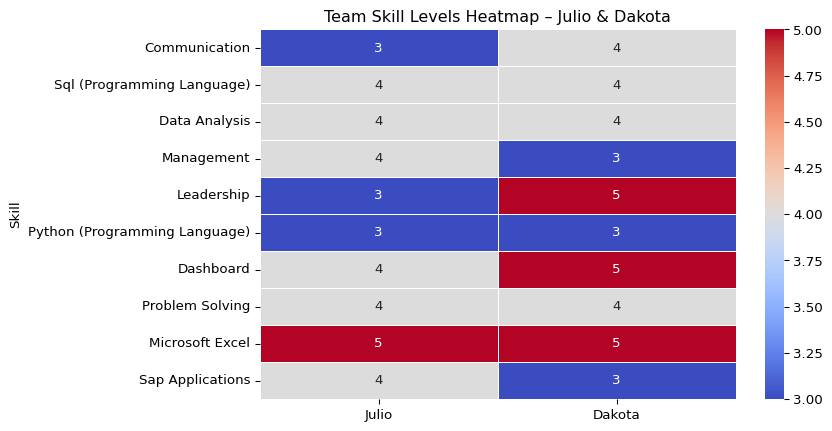

                           Skill  Julio  Dakota  Gap_Julio  Gap_Dakota
0                  Communication      3       4          2           1
1     Sql (Programming Language)      4       4          1           1
2                  Data Analysis      4       4          1           1
3                     Management      4       3          1           2
4                     Leadership      3       5          2           0
5  Python (Programming Language)      3       3          2           2
6                      Dashboard      4       5          1           0
7                Problem Solving      4       4          1           1
8                Microsoft Excel      5       5          0           0
9               Sap Applications      4       3          1           2


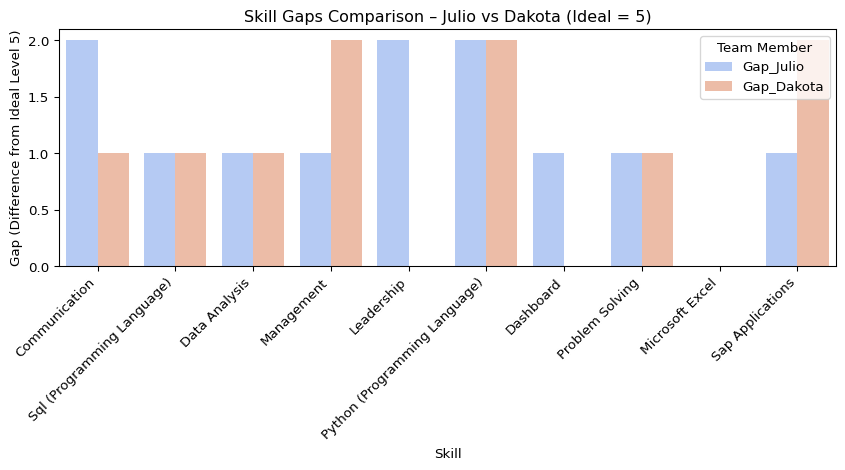

In [11]:
import pandas as pd

columns = [
    "COMPANY_NAME", "COMPANY_IS_STAFFING",              # Identification, company
    "POSTED", "EXPIRED", "DURATION", "MODELED_DURATION", # Dates, duration
    "TITLE_NAME", "EMPLOYMENT_TYPE_NAME", "IS_INTERNSHIP", # Job title, contract type
    "CITY_NAME", "STATE_NAME", "REMOTE_TYPE_NAME",       # Geographic
    "MIN_YEARS_EXPERIENCE", "MIN_EDULEVELS_NAME", "EDUCATION_LEVELS_NAME", # Education, experience
    "SALARY",                                             # Salary
    "SKILLS_NAME", "SPECIALIZED_SKILLS_NAME", "SOFTWARE_SKILLS_NAME", # Tech skills
    "COMMON_SKILLS_NAME",                                # Common, soft skills
    "CERTIFICATIONS_NAME"                                # Certif
]


df_columns = df.limit(4000).select([c for c in columns if c in df.columns])
df_columns_pd=df_columns.toPandas()

skill_cols = [
"SKILLS_NAME",
"SPECIALIZED_SKILLS_NAME",
"SOFTWARE_SKILLS_NAME",
"COMMON_SKILLS_NAME",
"CERTIFICATIONS_NAME"
]

df_columns_pd["ALL_SKILLS_RAW"] = df_columns_pd[skill_cols].fillna("").agg(" ".join, axis=1)
df_columns_pd["ALL_SKILLS_RAW"] = (
    df_columns_pd[skill_cols]
    .fillna("")
    .agg(" ".join, axis=1)
    .astype(str)
    .str.replace(r"[{}\[\]'\"]", "", regex=True)      # quita corchetes y comillas
    .str.replace(r"\b[Nn]one\b|nan", "", regex=True)  # quita None/nan
    .str.replace(r"[;|/]", ",", regex=True)           # normaliza separadores
    .str.replace(r"\s*,\s*", ", ", regex=True)        # limpia espacios entre comas
    .str.replace(r"\s{2,}", " ", regex=True)          # elimina espacios dobles
    .str.strip()                                      # quita espacios extra
)
print(df_columns_pd["ALL_SKILLS_RAW"].head(5))
pd.set_option('display.max_colwidth', None); print(df_columns_pd["ALL_SKILLS_RAW"].head(5).to_string(index=False))



# skills text to list.
df_columns_pd["ALL_SKILLS_LIST"] = df_columns_pd["ALL_SKILLS_RAW"].str.split(",")

# list to row
df_skills = df_columns_pd.explode("ALL_SKILLS_LIST")

# Clean up spaces and drop empty rows
df_skills = ( df_skills.dropna(subset=["ALL_SKILLS_LIST"]).loc[df_skills["ALL_SKILLS_LIST"].str.strip() != ""])
df_skills["ALL_SKILLS_LIST"] = ( df_skills["ALL_SKILLS_LIST"] .str.strip() .str.title())

# Count skills
top_skills = (df_skills["ALL_SKILLS_LIST"].value_counts().reset_index().rename(columns={"index": "Skill", "ALL_SKILLS_LIST": "Frequency"}))

# Show top 20
print(top_skills.head(20))

#                                    Frequency  count
# 0                              Communication   3394
# 1                 Sql (Programming Language)   3134
# 2                              Data Analysis   2960
# 3                                 Management   2116
# 4                                 Leadership   2023
# 5              Python (Programming Language)   1837
# 6                                  Dashboard   1791
# 7                            Problem Solving   1788
# 8                            Microsoft Excel   1771
# 9                           Sap Applications   1658
# 10                                Operations   1550
# 11                        Project Management   1528
# 12                          Business Process   1484



# 5 expert, 4 Advanced, 3 Intermediate, 2 Basic Knowledge, 1
top10_skills = [
    "Communication",
    "Sql (Programming Language)",
    "Data Analysis",
    "Management",
    "Leadership",
    "Python (Programming Language)",
    "Dashboard",
    "Problem Solving",
    "Microsoft Excel",
    "Sap Applications"
]

skills_data = {
    "Skill": top10_skills,
    "Julio": [3, 4, 4, 4, 3, 3, 4, 4, 5, 4],
    "Dakota": [4, 4, 4, 3, 5, 3, 5, 4, 5, 3]
}

df_team = pd.DataFrame(skills_data)
df_team


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df_team.set_index("Skill"), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Team Skill Levels Heatmap – Julio & Dakota")
plt.show()

# SKILL GAP (Ideal vs our skills)
df_team["Gap_Julio"] = 5 - df_team["Julio"]
df_team["Gap_Dakota"] = 5 - df_team["Dakota"]

# SHOT SKILLS
print(df_team[["Skill", "Julio", "Dakota", "Gap_Julio", "Gap_Dakota"]])


import matplotlib.pyplot as plt
import seaborn as sns

#Melt AND PLOT GAP
df_gaps_melted = df_team.melt(
    id_vars="Skill",
    value_vars=["Gap_Julio", "Gap_Dakota"],
    var_name="Member",
    value_name="Gap"
)

plt.figure(figsize=(9,5))
sns.barplot(data=df_gaps_melted, x="Skill", y="Gap", hue="Member", palette="coolwarm")
plt.title("Skill Gaps Comparison – Julio vs Dakota (Ideal = 5)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Gap (Difference from Ideal Level 5)")
plt.xlabel("Skill")
plt.legend(title="Team Member")
plt.tight_layout()
plt.show()


In [12]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("JobPostingsAnalysis").getOrCreate()

# Load the CSV file into a Spark DataFrame
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("../data/lightcast_job_postings.csv")


In [13]:
import pandas as pd
from pyspark.sql.functions import when, col

#Clean Data to convert to Pandas
columns_to_drop = ["ID", "BODY", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_4", "SOC_5", "LAST_UPDATED_DATE", "LAST_UPDATED_TIMESTAMP", "EXPIRED", "SOURCE_TYPES", "SOURCES", "ACTIVE_SOURCES_INFO", "MODELED_EXPIRED", "MODELED_DURATION", "NAICS2_NAME", "NAICS3_NAME", "NAICS4_NAME", "NAICS5_NAME", "NAICS6_NAME",
    "SOC_2_NAME", "SOC_3_NAME", "SOC_4_NAME", "SOC_5_NAME", "EDUCATION_LEVELS", "MIN_EDULEVELS"
    
]
cleaned_data = df.drop(*columns_to_drop)

cleaned_data = cleaned_data.withColumn(
    "REMOTE_TYPE_NAME",
    when(col("REMOTE_TYPE_NAME") == "Remote", "Remote")
    .when(col("REMOTE_TYPE_NAME") == "Hybrid Remote", "Hybrid")
    .when(col("REMOTE_TYPE_NAME") == "[None]", "On-site")
    .when(col("REMOTE_TYPE_NAME").isNull(), "On-site")
    .when(col("REMOTE_TYPE_NAME") == "Not Remote", "On-site")
    .otherwise(col("REMOTE_TYPE_NAME"))
)

cleaned_data = cleaned_data.withColumn(
    "EMPLOYMENT_TYPE_NAME",
    when(col("EMPLOYMENT_TYPE_NAME") == "Part-time / full-time", "Flexible")
    .when(col("EMPLOYMENT_TYPE_NAME").isNull(), "Full-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Part-time (â‰¤ 32 hours)", "Part-Time")
    .when(col("EMPLOYMENT_TYPE_NAME") == "Full-time (> 32 hours)", "Full-Time")
    .otherwise(col("EMPLOYMENT_TYPE_NAME")) 
)

cleaned_data = cleaned_data.filter(col("NAICS_2022_2_NAME") != "Unclassified Industry")

median_salary = cleaned_data.approxQuantile("SALARY", [0.5], 0.01)[0]
cleaned_data = cleaned_data.withColumn(
    "SALARY",
    when(col("SALARY").isNull(), median_salary).otherwise(col("SALARY"))
)

#Convert to Pandas
clean_pdf = cleaned_data.toPandas()


In [14]:
#| echo: true
#| eval: true
# Cleaning empty rows and dropping columns that are mostly empty


fill_cols = ["CITY_NAME", "CITY", "LOCATION", "STATE", "STATE_NAME", "COMPANY", "COMPANY_NAME"]
clean_pdf[fill_cols] = clean_pdf[fill_cols].fillna("Unknown")

clean_pdf = clean_pdf.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"], keep="first")

clean_pdf.dropna(thresh=len(clean_pdf)*0.5, axis=1, inplace=True)

#New Column to Classify AI Jobs and Add Month of Posting Date

ai_keywords = [
    "AI", "Machine Learning", "Data Scientist", "Data Analyst", "ML", 
    "Artificial Intelligence", "Deep Learning", "NLP", "Predictive Analytics"
]

#Function to classify AI vs Non-AI Jobs
def classify_ai(title):
    title_lower = str(title).lower()
    for keyword in ai_keywords:
        if keyword.lower() in title_lower:
            return "AI"
    return "Non-AI"

clean_pdf["AI_JOB"] = clean_pdf["TITLE_RAW"].apply(classify_ai)

clean_pdf["POSTED"] = pd.to_datetime(clean_pdf["POSTED"], errors="coerce")
clean_pdf["POSTED_MONTH"] = clean_pdf["POSTED"].dt.month

#Add column for URBAN vs RURAL

clean_pdf["URBAN_RURAL"] = clean_pdf["MSA_NAME"].apply(lambda x: "Urban" if pd.notnull(x) else "Rural")

    CLUSTER  \
13        0   
6         0   
1         0   
10        0   
8         0   
..      ...   
60        3   
69        3   
71        3   
63        3   
62        3   

                                                           NAICS_2022_2_NAME  \
13                          Professional, Scientific, and Technical Services   
6                                                      Finance and Insurance   
1   Administrative and Support and Waste Management and Remediation Services   
10                                                             Manufacturing   
8                                                                Information   
..                                                                       ...   
60                                           Accommodation and Food Services   
69                                   Management of Companies and Enterprises   
71                             Mining, Quarrying, and Oil and Gas Extraction   
63                 

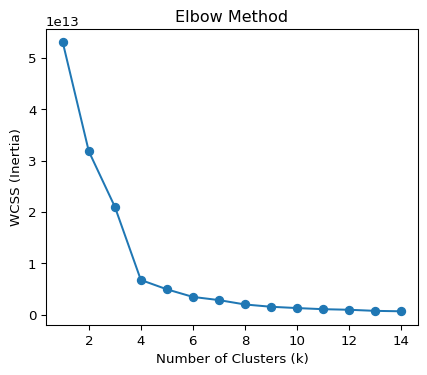

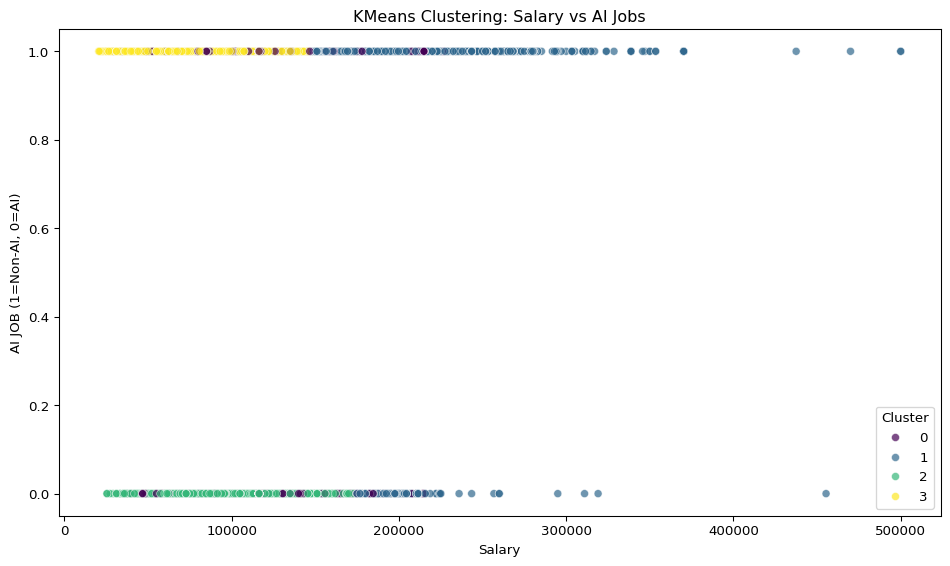

In [15]:
#KMeans clustering using NAICS as a reference but not a target

from sklearn.preprocessing import StandardScaler

# Select features
features = clean_pdf[["SALARY", "AI_JOB", "REMOTE_TYPE_NAME", "URBAN_RURAL"]]

# One-hot encode categorical columns
features_encoded = pd.get_dummies(features, columns=["AI_JOB", "REMOTE_TYPE_NAME", "URBAN_RURAL"], drop_first=True)

# Standardize numerical features (important for KMeans)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clean_pdf["CLUSTER"] = kmeans.fit_predict(features_scaled)

#Use Industry Name (NAICS2022) as a reference label

cluster_summary = (
    clean_pdf.groupby(["CLUSTER", "NAICS_2022_2_NAME"])
    .size()
    .reset_index(name="count")
    .sort_values(["CLUSTER", "count"], ascending=[True, False])
)

print(cluster_summary)

#Used an Elbow Method to choose the correct number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example features
X = features_encoded.values  # your numerical features

wcss = []
for k in range(1, 15):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.show()

cluster_summary.head(20)  # Show top 20 to see patterns

one_hot_cols = ['AI_JOB_Non-AI', 'REMOTE_TYPE_NAME_On-site', 'REMOTE_TYPE_NAME_Remote', 'URBAN_RURAL_Urban']

clean_pdf = pd.concat([clean_pdf, features_encoded[one_hot_cols]], axis=1)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=clean_pdf,
    x='SALARY',
    y='AI_JOB_Non-AI',  
    hue='CLUSTER',
    palette='viridis',
    alpha=0.7
)
plt.title("KMeans Clustering: Salary vs AI Jobs")
plt.xlabel("Salary")
plt.ylabel("AI JOB (1=Non-AI, 0=AI)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


/tmp/ipykernel_7310/24634743.py:14: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



NAICS_2022_6_NAME  Administrative Management and General Management Consulting Services  \
CLUSTER                                                                                   
0                                                                                   0.0   
1                                                                                1414.0   
2                                                                                   0.0   
3                                                                                2139.0   

NAICS_2022_6_NAME  Computer Systems Design Services  \
CLUSTER                                               
0                                               0.0   
1                                             376.0   
2                                             663.0   
3                                            2694.0   

NAICS_2022_6_NAME  Custom Computer Programming Services  \
CLUSTER                                                   
0   

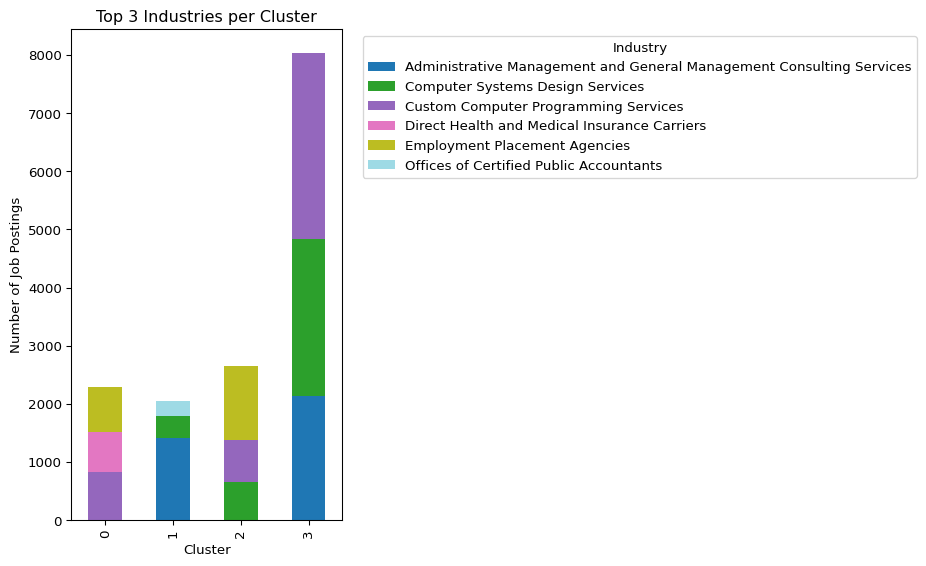

In [16]:
#Visualizing the NAICS Industries in reference to each cluster



import matplotlib.pyplot as plt


top_industries = (
    clean_pdf.groupby(["CLUSTER", "NAICS_2022_6_NAME"])
    .size()
    .reset_index(name="count")
)

top3 = top_industries.groupby("CLUSTER").apply(lambda x: x.nlargest(3, "count")).reset_index(drop=True)


pivot_df = top3.pivot(index="CLUSTER", columns="NAICS_2022_6_NAME", values="count").fillna(0)

print(pivot_df)

pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')  

plt.title("Top 3 Industries per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Job Postings")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Evaulation Metrics:
RMSE: 29,689.15
R2: 0.006

Top PositiveInfluences on Salary:
                                               Feature  Coefficient
45                               STATE_NAME_Washington  6361.179175
5                               STATE_NAME_Connecticut  5837.080401
43                                  STATE_NAME_Vermont  5302.264696
3                                STATE_NAME_California  4726.943831
51                             REMOTE_TYPE_NAME_Remote  4274.612550
50                            REMOTE_TYPE_NAME_On-site  4176.813834
2                                  STATE_NAME_Arkansas  4109.440464
46  STATE_NAME_Washington, D.C. (District of Columbia)  2818.294899
28                               STATE_NAME_New Jersey  2786.906817
11                                 STATE_NAME_Illinois  2575.153394

Top Negative Influences on Salary:
                     Feature   Coefficient
49        STATE_NAME_Wyoming  -3610.797563
47  STATE_NAME_West Virginia  -3985.698913
22    

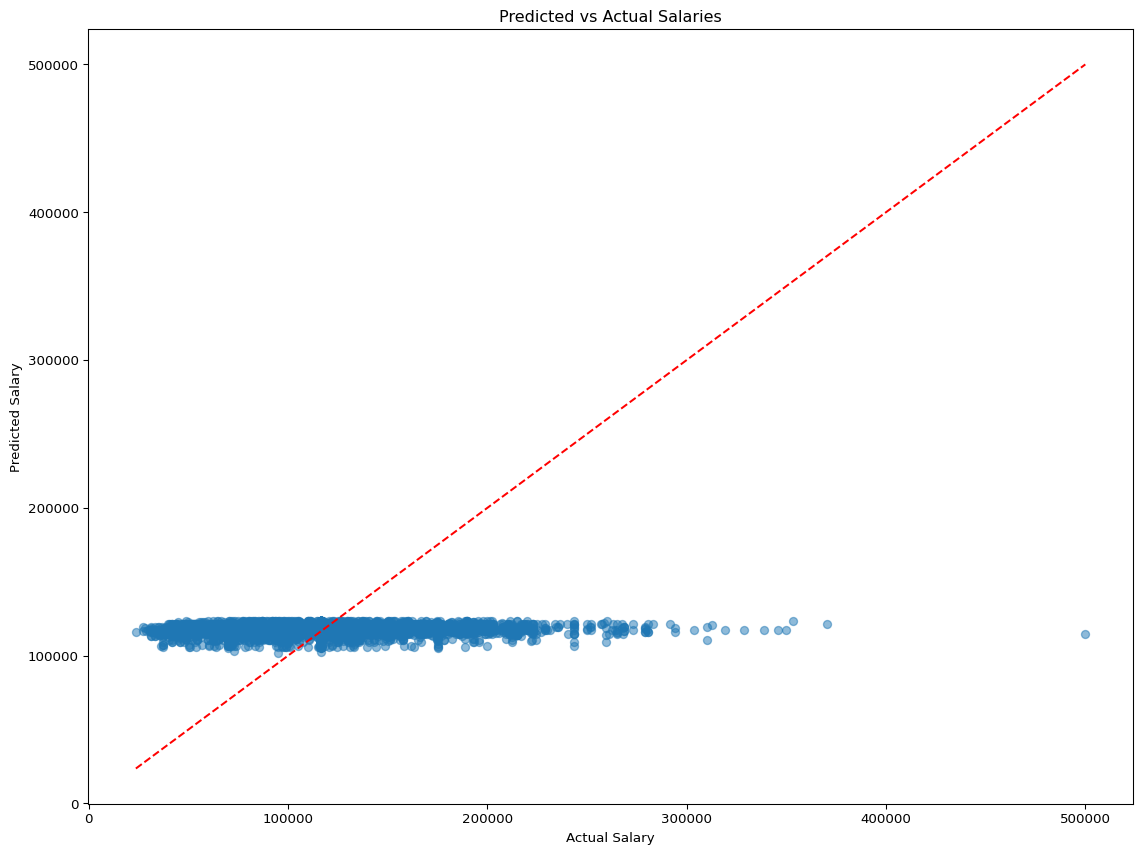

In [17]:
#Predicting Salaries based on Location Data through Linear Regression
#*Decided to run it in Pandas with Scikit as it's already been converted and cleaned

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

reg_data = clean_pdf[["SALARY", "STATE_NAME", "REMOTE_TYPE_NAME", "URBAN_RURAL"]]

X = pd.get_dummies(reg_data[["STATE_NAME", "REMOTE_TYPE_NAME", "URBAN_RURAL"]], drop_first=True)
y = reg_data["SALARY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Evaulation Metrics:")
print(f"RMSE: {rmse:,.2f}")
print(f"R2: {r2:.3f}")

df_coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nTop PositiveInfluences on Salary:")
print(df_coef.head(10))

print("\nTop Negative Influences on Salary:")
print(df_coef.tail(10))


plt.figure(figsize=(12,9))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salaries")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()
